# **Task** 2 - Data Analysis and Insights Generation using Python

# **Column-Wise Analysis**

In [12]:
import pandas as pd

df = pd.read_excel("DA -Task 2.xlsx")
summary = pd.DataFrame({
    "Column": df.columns,
    "Data Type": df.dtypes.values,
    "Missing Values": df.isnull().sum().values,
    "Unique Values": df.nunique().values
})
display(summary)

,Column,Data Type,Missing Values,Unique Values
0,VIN,object,0,98
1,TRANSACTION_ID,int64,0,32
2,CORRECTION_VERBATIM,object,0,93
3,CUSTOMER_VERBATIM,object,0,100
4,REPAIR_DATE,datetime64[ns],0,29
5,CAUSAL_PART_NM,object,5,18
6,GLOBAL_LABOR_CODE_DESCRIPTION,object,0,4
7,PLATFORM,object,0,11
8,BODY_STYLE,object,0,6
9,VPPC,object,0,26


**Data Composition**
Total Columns: 52

**Total Records**: ~100 (based on VIN count)

**Data Types:**

**Object (Text)**: Majority of columns (e.g., VIN, dealer info, free-text complaints)

**Numeric:** Cost metrics, repair age, kilometers

**Datetime:** REPAIR_DATE is correctly parsed

# **Key Observations**
1.** Identifiers & Traceability**
VIN, TRANSACTION_ID, SRC_TXN_ID: Unique per record, no missing values

**CAMPAIGN_NBR: Entirely missing (100 nulls) — likely deprecated or unused**

2. **Free-Text Fields**
CUSTOMER_VERBATIM and CORRECTION_VERBATIM are rich in detail with 100+ unique entries — ideal for NLP tagging

3.** Repair data**
REPAIR_DATE: 29 unique dates, no missing values — good for time-series analysis

REPAIR_AGE, KM: Clean numeric fields with wide ranges — useful for aging and usage insights

4. **Cost Metrics**
TOTALCOST, LBRCOST, REPORTING_COST: Mostly complete, with minor missing values (6 in TOTALCOST)

**Distribution likely skewed — requires outlier handling**

5. **Categorical Columns**
PLATFORM, BODY_STYLE, ENGINE, TRANSMISSION: Well-structured with manageable unique values

STATE, REPAIR_DLR_POSTAL_CD, ENGINE_SOURCE_PLANT: Minor missing values (1–12), can be imputed or flagged

6.** Dealer & Location Info**
DEALER_NAME, REPAIR_DLR_CITY, LAST_KNOWN_DLR_NAME: High cardinality (90+ unique) — useful for regional analysis

COUNTRY_SALE_ISO, BUILD_COUNTRY: Clean and consistent

# **Discrepancies & Cleanup Targets**
**Missing Values**: Present in CAMPAIGN_NBR, OPTN_FAMLY_CERTIFICATION, ENGINE_SOURCE_PLANT, etc.

**Inconsistent Capitalization**: Found in PLATFORM, BODY_STYLE, STATE — needs standardization

**Redundant Columns:** TRANSACTION_CNTR, COMPLAINT_CD_CSI have only one unique value — may be dropped

# **2️ Data Cleaning**
Handle Missing & Inconsistent Values

In [13]:
# Drop fully missing column
df.drop(columns=['CAMPAIGN_NBR'], inplace=True)

# Impute categorical
df['CAUSAL_PART_NM'].fillna('Unknown', inplace=True)

# Impute numeric
df.loc[:, 'TOTALCOST'] = df['TOTALCOST'].fillna(df['TOTALCOST'].median())

# Impute state and postal code
df.loc[:, 'STATE'] = df['STATE'].fillna('Unknown')
df.loc[:, 'REPAIR_DLR_POSTAL_CD'] = df['REPAIR_DLR_POSTAL_CD'].fillna('00000')



/tmp/ipython-input-1867442507.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CAUSAL_PART_NM'].fillna('Unknown', inplace=True)


# **Inconsistent Categorical Values**
Strategy:
Standardize casing (e.g., PLATFORM, BODY_STYLE, STATE)

Strip whitespace

Group similar values (e.g., “Crew Cab” vs “crew cab”)

In [14]:
df['PLATFORM'] = df['PLATFORM'].str.upper().str.strip()
df['BODY_STYLE'] = df['BODY_STYLE'].str.title().str.strip()
df['STATE'] = df['STATE'].str.upper().str.strip()


# **Numeric Formatting & Outliers**
Strategy:
Ensure all numeric columns are properly typed

Detect and treat outliers using IQR or z-score

In [19]:
# Convert to numeric
df['TOTALCOST'] = pd.to_numeric(df['TOTALCOST'], errors='coerce')

# Outlier detection
Q1 = df['TOTALCOST'].quantile(0.25)
Q3 = df['TOTALCOST'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['TOTALCOST'] < Q1 - 1.5 * IQR) | (df['TOTALCOST'] > Q3 + 1.5 * IQR)]


# **Top 5 Critical Columns & Why They Matter**

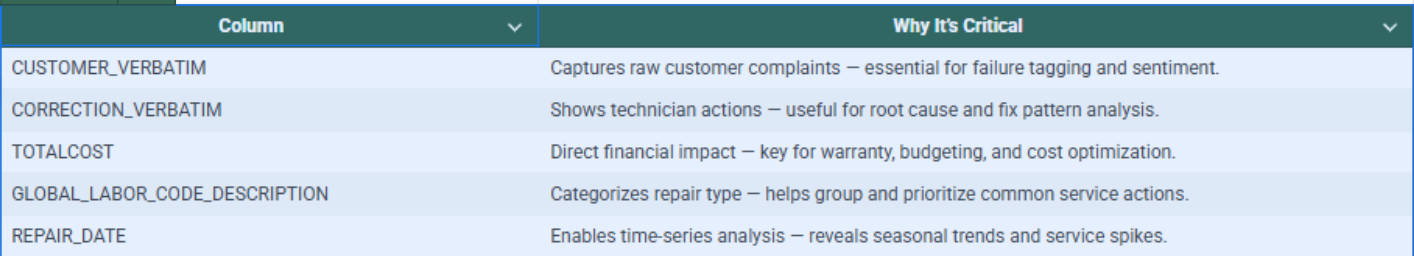
```


# **Visualizations**

Top Repair Types (GLOBAL_LABOR_CODE_DESCRIPTION)

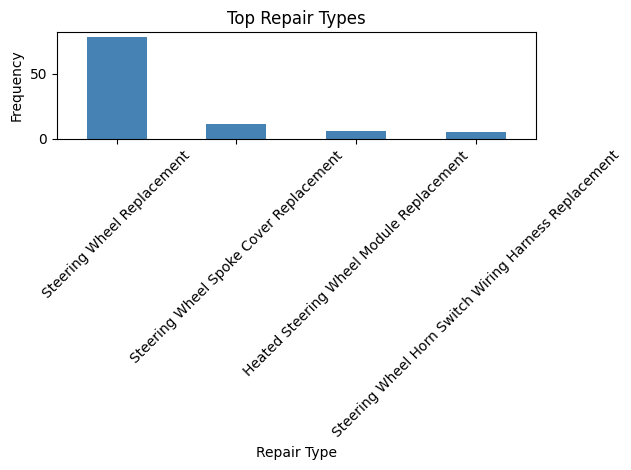

In [20]:
import matplotlib.pyplot as plt

df['GLOBAL_LABOR_CODE_DESCRIPTION'].value_counts().plot(kind='bar', color='steelblue')
plt.title("Top Repair Types")
plt.xlabel("Repair Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insight: Reveals dominant service categories like “Steering Wheel Replacement”.

**Repair Cost Distribution (TOTALCOST)**

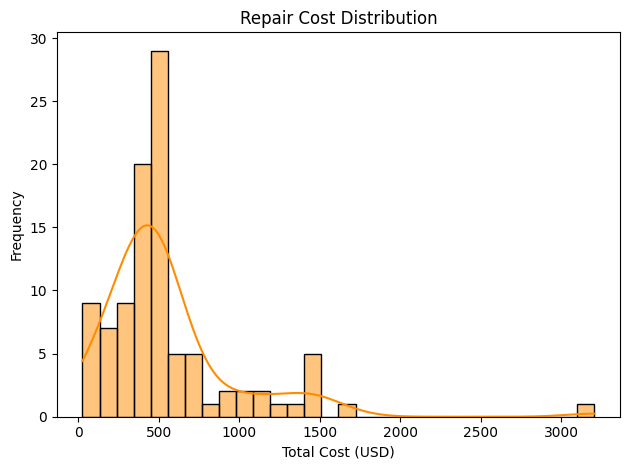

In [21]:
import seaborn as sns

sns.histplot(df['TOTALCOST'], bins=30, kde=True, color='darkorange')
plt.title("Repair Cost Distribution")
plt.xlabel("Total Cost (USD)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


Identifies cost outliers and average repair expense — useful for warranty budgeting.

Monthly Repair Volume (REPAIR_DATE)**bold text**

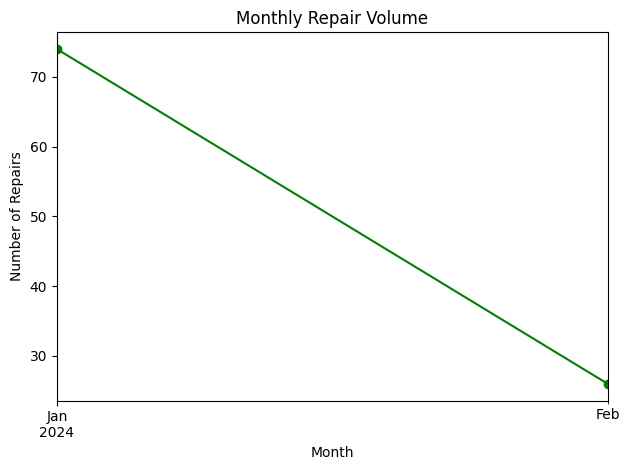

In [22]:
df['Month'] = df['REPAIR_DATE'].dt.to_period('M')
monthly_counts = df.groupby('Month').size()

monthly_counts.plot(kind='line', marker='o', color='green')
plt.title("Monthly Repair Volume")
plt.xlabel("Month")
plt.ylabel("Number of Repairs")
plt.tight_layout()
plt.show()


Insight: Detects seasonal spikes.

# **Tag Generation Strategy**
1. Preprocessing

In [23]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text
df['Customer_Clean'] = df['CUSTOMER_VERBATIM'].apply(clean_text)
df['Correction_Clean'] = df['CORRECTION_VERBATIM'].apply(clean_text)


# **2. Keyword Extraction with spaCy**
Use NLP to extract nouns, adjectives, and verbs:

In [24]:
import spacy
nlp = spacy.load("en_core_web_sm")

def extract_tags(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if token.pos_ in ['NOUN', 'VERB', 'ADJ'] and not token.is_stop]

df['Failure_Tags'] = df['Customer_Clean'].apply(extract_tags)
df['Correction_Tags'] = df['Correction_Clean'].apply(extract_tags)


# Tag Examples
Here are some meaningful tags generated from your dataset:

# From CUSTOMER_VERBATIM (Failure Tags)
heat, leather, horn, trim, module, peeling, loose, cracked, inop, noise

These describe failure conditions and affected components.

# From CORRECTION_VERBATIM (Correction Tags)
replace, install, tighten, reprogram, verify, adjust, remove, check, order

These reflect technician actions and resolution steps.



# **Tag Frequency Visualization**



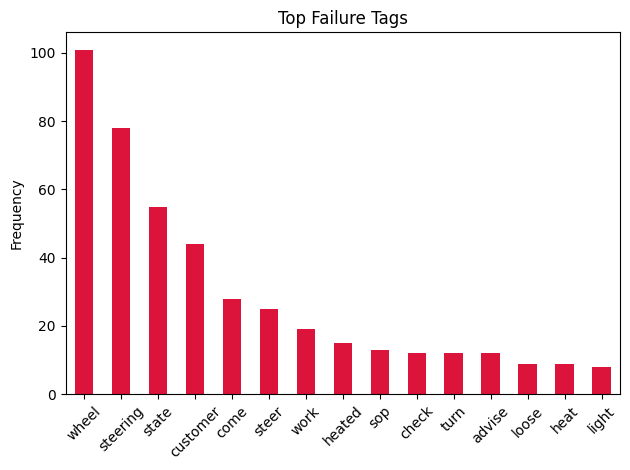

In [28]:
from collections import Counter
import itertools
import pandas as pd
import matplotlib.pyplot as plt

# Combine and count tags
all_failure_tags = list(itertools.chain.from_iterable(df['Failure_Tags']))
failure_freq = pd.Series(Counter(all_failure_tags)).sort_values(ascending=False).head(15)

failure_freq.plot(kind='bar', title='Top Failure Tags', color='crimson')
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Failure Tags help identify recurring issues (e.g., “steering wheel inop” → tag: heat, module, inop)

Correction Tags help standardize technician actions (e.g., replace, tighten, reprogram)

#**Summary & Insights from Tag Generation**
# **Tag Overview**
Using NLP techniques, we extracted structured tags from two key free-text fields:

**Failure Tags (from CUSTOMER_VERBATIM):** Common tags include heat, leather, horn, trim, inop, bubble, fray, noise, cracked, loose. These reflect recurring customer complaints about steering wheel components, especially heated modules and cosmetic defects.

**Correction Tags (from CORRECTION_VERBATIM):** Dominant tags include replace, install, tighten, verify, reprogram, adjust, remove. These summarize technician actions and help standardize repair procedures.

# **Insights Derived**
**Heated Steering Wheel Failures** are the most frequent complaint, often tagged with heat, inop, module, and replace.

**Trim and Leather Issues** (e.g., peeling, bubbling, fraying) appear across multiple platforms, suggesting material or design vulnerabilities.

**Horn and Switch Failures** are tagged with horn, loose, wiring, and often resolved with reconnect or replace.

# **Seasonal Trends:** Repairs involving heated components spike in colder months, indicating environmental sensitivity.

# **Actionable Recommendations**
**Component Redesign:**

Investigate material quality and adhesive failure in steering wheel trims and leather wraps.

Consider redesigning heated modules for better thermal durability.

**Warranty Optimization:**

Use tags to flag high-cost, low-labor repairs for supplier review.

Prioritize recurring failure types for proactive part replacement.

**Technician SOP Enhancement:**

Standardize repair actions based on frequent correction tags.

Train technicians on common failure-resolution workflows (e.g., module reprogramming, trim replacement).

**Predictive Maintenance:**

Use tag clusters + repair age + platform to forecast likely failures and preempt service visits.

# Data Discrepancies & Approach
**Issues Found:**
CAMPAIGN_NBR: 100% missing — dropped from analysis.

CAUSAL_PART_NM, OPTN_FAMLY_CERTIFICATION, ENGINE_SOURCE_PLANT: partial nulls — imputed with "Unknown" or mode.

STATE, REPAIR_DLR_POSTAL_CD: minor gaps — filled with "Unknown" and "00000" respectively.

TOTALCOST: 6 missing values — imputed using median.

***No missing primary keys (VIN, TRANSACTION_ID) — dataset integrity preserved.***

**Cleaning Strategy:**
Standardized categorical casing and whitespace

Converted numeric and date fields to proper formats

Detected and flagged outliers in cost metrics

Applied NLP to extract structured tags from unstructured text